# ECE 285 – Project B Total Variation

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import numpy.fft as npf
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools.projectB as im
starfish = plt.imread('assets/starfish.png')
flowers = plt.imread('assets/flowers.png')
ball = plt.imread('assets/ball.png')
%matplotlib notebook

## 1 Operators

### 1

#### 2

### 3

### 4

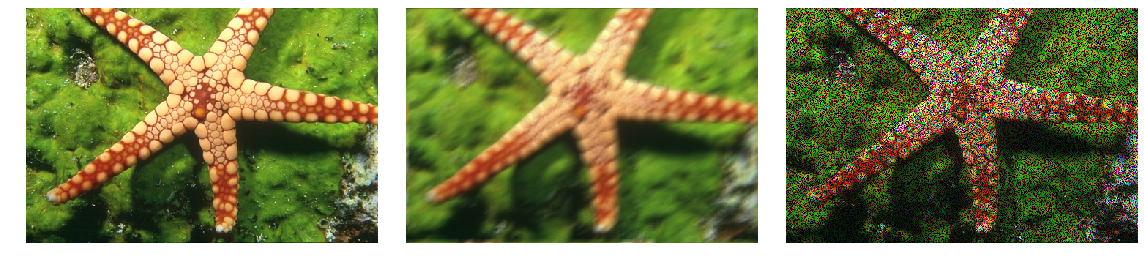

In [21]:
x0 = starfish
I = im.Identity(x0.shape)
nu = im.kernel('motion')
C = im.Convolution(x0.shape, nu)
R = im.RandomMasking(x0.shape, 0.4)
x1 = I(x0)
x2 = C(x0)
x3 = R(x0)
fig, axes = plt.subplots(ncols=3, figsize=(16,4)) 
im.show(x1, ax=axes[0])
im.show(x2, ax=axes[1])
im.show(x3, ax=axes[2])
fig.show()

### 5

In [10]:
x = starfish
y = flowers

x_ic = im.Identity(x.shape)(x)
y_ia = im.Identity(y.shape).adjoint(y)
print("The statement for Identity operator:",np.isclose(np.sum(x_ic*y),np.sum(x*y_ia)))

nu = im.kernel('motion')
x_cc = im.Convolution(x.shape, nu)(x)
y_ca = im.Convolution(y.shape, nu).adjoint(y)
print("The statement for Convolution operator:",np.isclose(np.sum(x_cc*y),np.sum(x*y_ca)))

x_rc = im.RandomMasking(x.shape, 1)(x)
y_ra = im.RandomMasking(y.shape, 1)(y)
print("The statement for RandomMasking operator:",np.isclose(np.sum(x_rc*y),np.sum(x*y_ra)))

The statement for Identity operator: True
The statement for Convolution operator: True
The statement for RandomMasking operator: True


### 6

In [11]:
t = 0.1
xi = im.Identity(x.shape)
x_il = xi.gram_resolvent(x+t*xi.gram(x), t)
print("The statement for Identity operator:",np.allclose(x_il, x))

nu = im.kernel('motion')
xc = im.Convolution(x.shape, nu)
x_cl = xc.gram_resolvent(x+t*xc.gram(x), t)
print("The statement for Convolution operator:",np.allclose(x_cl, x))

xr = im.Identity(x.shape, 0.4)
x_rl = xr.gram_resolvent(x+t*xr.gram(x), t)
print("The statement for RandomMasking operator:",np.allclose(x_rl, x))

The statement for Identity operator: True
The statement for Convolution operator: True
The statement for RandomMasking operator: True


## 2 Smoothed Total-Variation

### 7

### 8

1. Given:
$$ E(x)=\frac { 1 }{ 2 } { ||y-Hx|| }_{ 2 }^{ 2 }+\tau { ||\triangledown x|| }_{ 1 } $$
2. Approximately,
$$ |\triangledown x|=\sqrt { { |\triangledown x| }^{ 2 }+\varepsilon   } $$
3. For the first part,
$$\begin{align}
\triangledown \frac { 1 }{ 2 } { ||y-Hx|| }_{ 2 }^{ 2 } &= \triangledown \frac { 1 }{ 2 } ({ ||Hx|| }^{ 2 }+{ ||y|| }^{ 2 }-2<Hx,y>)\\
&= \triangledown \frac { 1 }{ 2 } (<x,{ H }^{ * }Hx>+{ ||y|| }^{ 2 }-2<x,{ H }^{ * }y>)\\
&= \frac { 1 }{ 2 } (({ H }^{ * }H+{ H }^{ * }H)x-2{ H }^{ * }y)\\
&= { H }^{ * }(Hx-y)\\
\end{align}$$
4. For the second part,
$$\begin{align}
\triangledown \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  } &=-\triangledown \cdot (\frac { \triangledown x }{ \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  }  } )\\ 
&=-div(\frac { \triangledown x }{ \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  }  } )\\
\end{align}$$
5. Therefore,
$$
\triangledown E(x)={ H }^{ * }(Hx-y)-div(\frac { \triangledown x }{ \sqrt { { |\triangledown x| }^{ 2 }+\varepsilon  }  } )
$$

### 9

### 10

### 11

In [33]:
x0 = starfish
sig = 20/255
y = x0 + sig * np.random.randn(*x.shape)
x1, e1 = im.total_variation(y, sig, H = None, m = 400, scheme = 'gd', rho=1, return_energy = True)
x2, e2 = im.total_variation(y, sig, H = None, m = 400, scheme = 'nesterov', rho=1, return_energy = True)

In [34]:
print(e1[0])
# fig, axes = plt.subplots(ncols=3, figsize=(16,4)) 
# plt.subplot(1,3,1)
# plt.plot(e1,'b-',e2,'y-')
# plt.subplot(1,3,2)
# plt.imshow(y)
# plt.subplot(1,3,3)
# plt.imshow(x0)
# fig.show()

10978.78280426673
